# Data Wrangling<a id='Data_Wrangling'>

Data Source: https://www.kaggle.com/datasets/benjameeper/movie-violencesexprofanity-data?resource=download

## Table of Contents<a id='Table_of_Contents'>

* [Data Wrangling](#Data_Wrangling)
  * [Table of Contents](#Table_of_Contents)
  * [Imports](#Imports)
  * [Functions](#Functions)
  * [Load The Data](#Load_the_Data)
  * [Clean the Data](#Clean_the_Data)
      * [tags](#tags)
      * [movies](#movies)
      * [movie_tags](#movie_tags)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Save the Data](#Save_the_Data)

## Imports <a id='Imports'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Functions <a id='Functions'>

In [2]:
def plot_histogram_with_counts(data_frame, column_name, bin_edges):
    # Create the histogram
    hist, bin_edges, _ = plt.hist(data_frame[column_name], bins=bin_edges, alpha=0.7)

    # Display the count on each bar
    for i, count in enumerate(hist):
        plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i]) / 2, count, str(int(count)), ha='center', va='bottom')

    plt.xlabel(column_name.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name.capitalize()}')
    plt.show()

## Load the Data <a id='Load_the_Data'>

In [3]:
tags = pd.read_csv('data/raw_data/tags.csv')
movies = pd.read_csv('data/raw_data/movies.csv')
movie_tags = pd.read_csv('data/raw_data/movie_tags.csv')

## Clean the Data <a id='Clean_the_Data'>

### tags <a id='tags'>

In [4]:
tags

,category,tag_name,title,description
0,language,profanity,Profanity,NaN
1,language,blasphemy,Blasphemy,NaN
2,language,sexual_reference,Sexual References and Innuendos,"Any references or jokes about sex, flirting, i..."
3,language,childish_language,Childish Language,"Generally, things you would not want your 3-ye..."
4,language,racial_slurs,Racial Slurs and Bigoted Language,"Racist, sexist, and/or discriminatory language..."
5,violence,non_graphic,Non-Graphic,Violence without blood.
6,violence,graphic,Graphic,Violence with blood or breaking bones.
7,violence,disturbing_images,Disturbing Images,"Dead bodies, severed body parts, or object pro..."
8,violence,gore,Gore,"Gore, bloody guts, bloody severed body parts."
9,violence,violence_implied,Implied Violence,The violence is not seen on screen. Graphic de...


In [5]:
#Add an other tag_name under the other category to be able to capture anything that does not already have a specific tag.
new_row = pd.DataFrame({'category': ['other'], 'tag_name': ['other'],'title': ['Other']})

tags = pd.concat([tags, new_row], ignore_index=True)

tags


,category,tag_name,title,description
0,language,profanity,Profanity,NaN
1,language,blasphemy,Blasphemy,NaN
2,language,sexual_reference,Sexual References and Innuendos,"Any references or jokes about sex, flirting, i..."
3,language,childish_language,Childish Language,"Generally, things you would not want your 3-ye..."
4,language,racial_slurs,Racial Slurs and Bigoted Language,"Racist, sexist, and/or discriminatory language..."
5,violence,non_graphic,Non-Graphic,Violence without blood.
6,violence,graphic,Graphic,Violence with blood or breaking bones.
7,violence,disturbing_images,Disturbing Images,"Dead bodies, severed body parts, or object pro..."
8,violence,gore,Gore,"Gore, bloody guts, bloody severed body parts."
9,violence,violence_implied,Implied Violence,The violence is not seen on screen. Graphic de...


### movies <a id='movies'>

In [6]:
movies

,imdb_id,name,title_main,title_subscript,year,mpaa_rating,duration_sec,studio
0,tt11274492,The Out-Laws,The Out-Laws,NaN,2023,R,5700,Happy Madison Productions
1,tt12263384,Extraction 2,Extraction 2,NaN,2023,R,7380,Filmhaus Films|AGBO
2,tt16419074,Air,Air,NaN,2023,R,6720,Mandalay Pictures|Amazon Studios|Skydance Spor...
3,tt14400246,Bird Box Barcelona,Bird Box Barcelona,NaN,2023,TV-MA,7440,Nostromo Pictures|Bluegrass Films|Chris Morgan...
4,tt1745960,Top Gun: Maverick,Top Gun: Maverick,NaN,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Don Simpson/...
...,...,...,...,...,...,...,...,...
1729,tt6902676,Guns Akimbo,Guns Akimbo,NaN,2020,R,5700,Ingenious Media|Occupant Films|Four Knights Fi...
1730,tt3813310,Cop Car,Cop Car,NaN,2015,R,5280,Universal
1731,tt2091935,Mr. Right,Mr. Right,NaN,2016,R,5700,Focus World
1732,tt13372794,The Manor,The Manor,NaN,2021,TV-MA,4860,Amazon Studios|Blumhouse Television


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   imdb_id          1734 non-null   object
 1   name             1734 non-null   object
 2   title_main       1734 non-null   object
 3   title_subscript  32 non-null     object
 4   year             1734 non-null   int64 
 5   mpaa_rating      1734 non-null   object
 6   duration_sec     1734 non-null   int64 
 7   studio           1734 non-null   object
dtypes: int64(2), object(6)
memory usage: 108.5+ KB


In [8]:
subscript_movies = movies[movies.title_subscript > ""]

subscript_movies

,imdb_id,name,title_main,title_subscript,year,mpaa_rating,duration_sec,studio
39,tt1229238,Mission: Impossible IV: Ghost Protocol,Mission: Impossible IV,Ghost Protocol,2011,PG-13,7980,Paramount Pictures
56,tt2368619,Bastille Day: The Take,Bastille Day,The Take,2016,R,5520,StudioCanal
76,tt0103064,Terminator 2: Judgment Day,Terminator 2,Judgment Day,1991,R,8220,Lions Gate Entertainment
177,tt1590193,The Commuter: Lives are on the line,The Commuter,Lives are on the line,2018,PG-13,6240,StudioCanal
244,tt9742794,The Vault: aka Way Down,The Vault,aka Way Down,2021,R,7080,Telecinco Cinema|Think Studio|Saban Films|Ciud...
245,tt2250912,Spider-Man: Homecoming: Theatrical Version,Spider-Man: Homecoming,Theatrical Version,2017,PG-13,7980,Columbia Pictures Industries
290,tt4106376,American Renegades: (aka Renegades),American Renegades,(aka Renegades),2017,PG-13,6300,Studio Babelsberg
345,tt4514646,Tim Timmerman: Hope of America,Tim Timmerman,Hope of America,2017,PG-13,5916,VidAngel Studios
412,tt5536736,The Meyerowitz Stories: New and Selected,The Meyerowitz Stories,New and Selected,2017,TV-MA,6720,IAC Films
422,tt9657544,Jim Gaffigan: Quality Time,Jim Gaffigan,Quality Time,2019,PG-13,4500,Comedy Dynamics


Looks like the title_subtitle column takes the name of the movie and if there exists a ':', substrings the title where anything before the ':' is the title and anything after is the subtitle. Let's now check to see if any duplicate title_mains exist in the original movies dataframe.

In [9]:
check_dups = []

for title in subscript_movies['title_main']:
    result = movies[movies['title_main'] == title]
    check_dups.append(result)

check_dups_df = pd.concat(check_dups, ignore_index=True).sort_values(by='name')
check_dups_df

,imdb_id,name,title_main,title_subscript,year,mpaa_rating,duration_sec,studio
23,tt5503688,6 Below: Miracle on the Mountain,6 Below,Miracle on the Mountain,2017,PG-13,5820,Dune Entertainment
6,tt4106376,American Renegades: (aka Renegades),American Renegades,(aka Renegades),2017,PG-13,6300,Studio Babelsberg
1,tt2368619,Bastille Day: The Take,Bastille Day,The Take,2016,R,5520,StudioCanal
28,tt4230700,Complete Unknown: Identities,Complete Unknown,Identities,2016,R,5460,Parts and Labor
26,tt3317234,"Game Over, Man!: Game Over, Man!","Game Over, Man!","Game Over, Man!",2018,TV-MA,6060,Point Grey Pictures
12,tt5052448,Get Out: (with alternate ending),Get Out,(with alternate ending),2017,R,6240,Universal Pictures
24,tt10665338,Halloween Kills: Extended Cut,Halloween Kills,Extended Cut,2021,TV-MA,6300,Lionsgate
20,tt5726086,Insidious: The Last Key,Insidious,The Last Key,2018,PG-13,6180,Stage 6 Films
19,tt2908446,Insurgent: Insurgent,Insurgent,Insurgent,2015,PG-13,7140,Universal
9,tt9657544,Jim Gaffigan: Quality Time,Jim Gaffigan,Quality Time,2019,PG-13,4500,Comedy Dynamics


In [10]:
check_dups_df[check_dups_df.duplicated()]

,imdb_id,name,title_main,title_subscript,year,mpaa_rating,duration_sec,studio


Not seeing any duplicates for all titles that exist so seems like title_main and title_subscript may not be needed since the name column should have the accurate movie title with no duplicates. Let's now check for duplicates for all movies. 

In [11]:
movies[movies.duplicated()]

,imdb_id,name,title_main,title_subscript,year,mpaa_rating,duration_sec,studio


No current duplicates. Let's drop those two columns now then view the data. 

In [12]:
movies.drop(['title_main','title_subscript'], axis=1, inplace=True)

In [13]:
movies

,imdb_id,name,year,mpaa_rating,duration_sec,studio
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions
1,tt12263384,Extraction 2,2023,R,7380,Filmhaus Films|AGBO
2,tt16419074,Air,2023,R,6720,Mandalay Pictures|Amazon Studios|Skydance Spor...
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Bluegrass Films|Chris Morgan...
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Don Simpson/...
...,...,...,...,...,...,...
1729,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Occupant Films|Four Knights Fi...
1730,tt3813310,Cop Car,2015,R,5280,Universal
1731,tt2091935,Mr. Right,2016,R,5700,Focus World
1732,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television


### movie_tags <a id='movie_tags'>

In [14]:
movie_tags

,imdb_id,category,tag_name,occurrence_cnt,duration_sec
0,tt0052357,language,blasphemy,1,0
1,tt0052357,violence,non_graphic,5,30
2,tt0052357,violence,disturbing_images,1,0
3,tt0052357,immodesty,immodesty,1,6
4,tt0052357,immodesty,nudity_implied,1,30
...,...,...,...,...,...
23975,tt9902160,violence,non_graphic,9,18
23976,tt9902160,violence,graphic,4,12
23977,tt9902160,immodesty,immodesty,3,30
23978,tt9902160,sexual,sexually_suggestive,1,6


In [15]:
movie_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23980 entries, 0 to 23979
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdb_id         23980 non-null  object
 1   category        23980 non-null  object
 2   tag_name        23980 non-null  object
 3   occurrence_cnt  23980 non-null  int64 
 4   duration_sec    23980 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 936.8+ KB


In [16]:
movie_tags[movie_tags.duplicated()]

,imdb_id,category,tag_name,occurrence_cnt,duration_sec


# Exploratory Data Analysis <a id='Exploratory_Data_Analysis'>

In [17]:
movies

,imdb_id,name,year,mpaa_rating,duration_sec,studio
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions
1,tt12263384,Extraction 2,2023,R,7380,Filmhaus Films|AGBO
2,tt16419074,Air,2023,R,6720,Mandalay Pictures|Amazon Studios|Skydance Spor...
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Bluegrass Films|Chris Morgan...
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Don Simpson/...
...,...,...,...,...,...,...
1729,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Occupant Films|Four Knights Fi...
1730,tt3813310,Cop Car,2015,R,5280,Universal
1731,tt2091935,Mr. Right,2016,R,5700,Focus World
1732,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television


In [18]:
movies.describe()

,year,duration_sec
count,1734.000000,1734.000000
mean,2013.159170,6500.199539
std,10.082295,1070.351719
min,1958.000000,1943.000000
25%,2011.000000,5760.000000
50%,2017.000000,6360.000000
75%,2019.000000,7080.000000
max,2023.000000,12540.000000


In [19]:
movies['name'].value_counts() 

Hypnotic               2
The Mummy              2
The Ride               2
Jumanji                2
Little Women           2
                      ..
The Rundown            1
Luck                   1
Gunpowder Milkshake    1
Stonehearst Asylum     1
Mute                   1
Name: name, Length: 1718, dtype: int64

In [20]:
# Calculate the count of each movie name
name_counts = movies['name'].value_counts()

# Filter for names that have a count greater than 1
non_unique_names = name_counts[name_counts > 1]

# Filter the original DataFrame to include only rows with non-unique names
non_unique_names_df = movies[movies['name'].isin(non_unique_names.index)]

# Sort the result by the 'name' column
non_unique_names_df_sorted = non_unique_names_df.sort_values(by='name')

non_unique_names_df_sorted

,imdb_id,name,year,mpaa_rating,duration_sec,studio
1548,tt10691162,Aftermath,2021,TV-MA,6840,Productivity Media
692,tt4581576,Aftermath,2017,R,5520,Ingenious Media
2,tt16419074,Air,2023,R,6720,Mandalay Pictures|Amazon Studios|Skydance Spor...
1569,tt2091478,Air,2015,PG-13,5640,Oddfellows Entertainment
923,tt0112442,Bad Boys,1995,R,7140,Sony Pictures
906,tt0085210,Bad Boys,1983,R,7380,"Thorn E M I Films, Inc."
820,tt5886046,Escape Room,2019,PG-13,6000,Columbia Pictures|Original Film
1212,tt5159414,Escape Room,2017,R,4800,Escape Productions
1564,tt3086442,Goodnight Mommy,2014,R,6000,Anchor Bay
606,tt9000184,Goodnight Mommy,2022,R,5460,Playtime|Animal Kingdom


Looks like the moveis with the same titles tend to be remakes or separate movies entirely. 

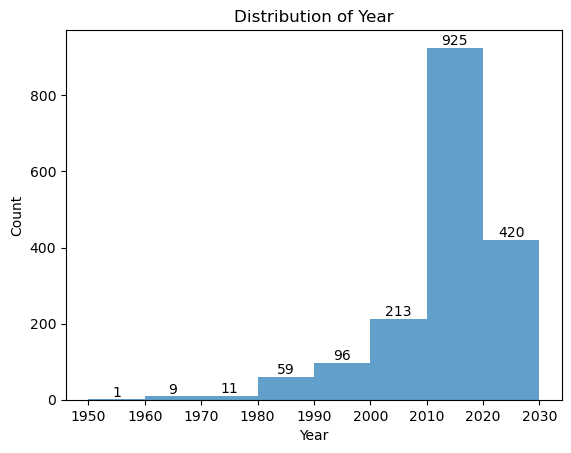

In [21]:
bin_edges = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
plot_histogram_with_counts(movies, 'year', bin_edges)

# Save the Data <a id='Save_the_Data'>

In [22]:
#Save the modified dataframe to a new .csv file called clean_data.csv
tags.to_csv("data/clean_data/cleaned_tags.csv", index=False)
movies.to_csv("data/clean_data/cleaned_movies.csv", index=False)
movie_tags.to_csv("data/clean_data/cleaned_movie_tags.csv", index=False)